In [1]:
import pandas as pd
from sklearn.metrics import precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def plot_pr_curve(x, y, x_label="", y_label="", min_y=0, max_y=1):
    fig, ax = plt.subplots(figsize=(5, 2.8))
    ax.plot(x, y)

    ax.tick_params(axis='x', rotation=90)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.yaxis.set_tick_params(which='major', width=1, direction='inout')
    ax.yaxis.set_tick_params(which='minor', width=1, direction='inout')

    major_step = (max_y-min_y)/5
    minor_step = (max_y-min_y)/10

    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(major_step))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(minor_step))

    ax.set_ylim(min_y, max_y)

    plt.show()

Evaluation of Precision, Recall and F1-score for 10-fold CV predictions

Evaluation for binary task, given a tweet predict if it is related or unrelated to science

In [3]:
cv_predictions = pd.read_csv('classifier_preds/scibert_cv_predictions.tsv', sep='\t')

Classification Report and Confusion Matrix for the binary task, given a Tweet predict if it is related or unrelated to science:
Classification Report:
               precision    recall  f1-score   support

       False     0.9267    0.9303    0.9285       775
        True     0.8470    0.8399    0.8434       356

    accuracy                         0.9019      1131
   macro avg     0.8869    0.8851    0.8860      1131
weighted avg     0.9016    0.9019    0.9017      1131


Confusion matrix:


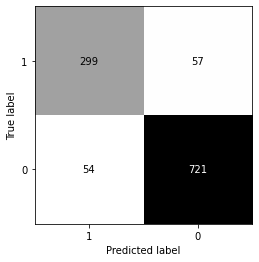

In [4]:
print(f"Classification Report and Confusion Matrix for the binary task, given a Tweet predict if it is related or unrelated to science:")
cv_predictions['pos_prediction'] = (cv_predictions['cat1_pred'] == 1) | (cv_predictions['cat2_pred'] == 1) | (cv_predictions['cat3_pred'] == 1)
cv_predictions['pos_label'] = (cv_predictions['cat1_final_answer'] == 1) | (cv_predictions['cat2_final_answer'] == 1) | (cv_predictions['cat3_final_answer'] == 1)

cm = confusion_matrix(cv_predictions['pos_label'], cv_predictions['pos_prediction'], labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])

print(f"Classification Report:\n {classification_report(cv_predictions['pos_label'], cv_predictions['pos_prediction'], digits=4)}\n")

print(f"Confusion matrix:")
disp.plot(include_values=True, cmap='gist_gray_r', ax=None, xticks_rotation='horizontal', values_format=None, colorbar=False)
plt.show()



In [5]:
false_positives = cv_predictions[(cv_predictions['pos_label']==0) & (cv_predictions['pos_prediction']==1)]
print(f'Number of False Positives: {len(false_positives)}')
num_cat1_fp = false_positives['cat1_pred'].value_counts().loc[1]
num_cat2_fp = false_positives['cat2_pred'].value_counts().loc[1]
num_cat3_fp = false_positives['cat3_pred'].value_counts().loc[1]
print(f'Number of Tweets where Cat1.1 FP lead to Cat1 FP: {num_cat1_fp}')
print(f'Number of Tweets where Cat1.2 FP lead to Cat1 FP: {num_cat2_fp}')
print(f'Number of Tweets where Cat1.3 FP lead to Cat1 FP: {num_cat3_fp}')

Number of False Positives: 54
Number of Tweets where Cat1.1 FP lead to Cat1 FP: 40
Number of Tweets where Cat1.2 FP lead to Cat1 FP: 13
Number of Tweets where Cat1.3 FP lead to Cat1 FP: 20


In [6]:
false_negatives = cv_predictions[(cv_predictions['pos_label']==1) & (cv_predictions['pos_prediction']==0)]
print(f'Number of False Negatives: {len(false_negatives)}')
num_cat1_fn = false_negatives['cat1_final_answer'].value_counts().loc[1]
num_cat2_fn = false_negatives['cat2_final_answer'].value_counts().loc[1]
num_cat3_fn = false_negatives['cat3_final_answer'].value_counts().loc[1]
print(f'Number of Tweets where Cat1.1 FN lead to Cat1 FN: {num_cat1_fn}')
print(f'Number of Tweets where Cat1.2 FN lead to Cat1 FN: {num_cat2_fn}')
print(f'Number of Tweets where Cat1.3 FN lead to Cat1 FN: {num_cat3_fn}')

Number of False Negatives: 57
Number of Tweets where Cat1.1 FN lead to Cat1 FN: 35
Number of Tweets where Cat1.2 FN lead to Cat1 FN: 13
Number of Tweets where Cat1.3 FN lead to Cat1 FN: 28


Evaluation of multilabel task, given a tweet predict the subcategories of science-relatedness

Category 1.1

Classification Report:
               precision    recall  f1-score   support

       False     0.9439    0.9212    0.9324       876
        True     0.7500    0.8118    0.7797       255

    accuracy                         0.8966      1131
   macro avg     0.8469    0.8665    0.8560      1131
weighted avg     0.9002    0.8966    0.8980      1131


Confusion matrix:


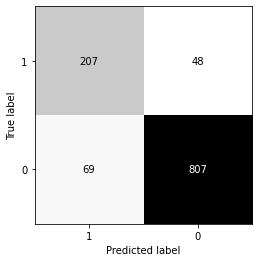

In [7]:
cat = 'cat1'
cv_predictions['pos_prediction'] = cv_predictions[f'{cat}_pred'] == 1
cv_predictions['pos_label'] = cv_predictions[f'{cat}_final_answer'] == 1

cm = confusion_matrix(cv_predictions['pos_label'], cv_predictions['pos_prediction'], labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])

print(f"Classification Report:\n {classification_report(cv_predictions['pos_label'], cv_predictions['pos_prediction'], digits=4)}\n")

print(f"Confusion matrix:")
disp.plot(include_values=True, cmap='gist_gray_r', ax=None, xticks_rotation='horizontal', values_format=None, colorbar=False)
plt.show()

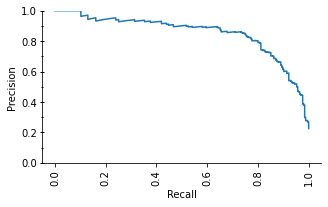

In [8]:
p, r, _ = precision_recall_curve(cv_predictions['cat1_final_answer'],cv_predictions['cat1_score'])
plot_pr_curve(r, p, x_label='Recall', y_label='Precision')

Category 1.2

Classification Report:
               precision    recall  f1-score   support

       False     0.9544    0.9523    0.9533       944
        True     0.7619    0.7701    0.7660       187

    accuracy                         0.9222      1131
   macro avg     0.8581    0.8612    0.8596      1131
weighted avg     0.9225    0.9222    0.9224      1131


Confusion matrix:


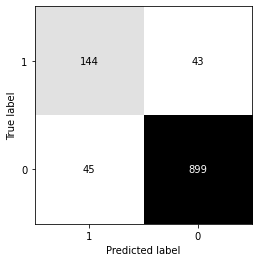

In [9]:
cat = 'cat2'
cv_predictions['pos_prediction'] = cv_predictions[f'{cat}_pred'] == 1
cv_predictions['pos_label'] = cv_predictions[f'{cat}_final_answer'] == 1

cm = confusion_matrix(cv_predictions['pos_label'], cv_predictions['pos_prediction'], labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])

print(f"Classification Report:\n {classification_report(cv_predictions['pos_label'], cv_predictions['pos_prediction'], digits=4)}\n")

print(f"Confusion matrix:")
disp.plot(include_values=True, cmap='gist_gray_r', ax=None, xticks_rotation='horizontal', values_format=None, colorbar=False)
plt.show()

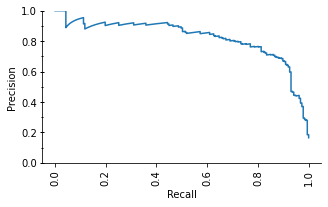

In [10]:
p, r, _ = precision_recall_curve(cv_predictions['cat2_final_answer'],cv_predictions['cat2_score'])
plot_pr_curve(r, p, x_label='Recall', y_label='Precision')

Category 1.3

Classification Report:
               precision    recall  f1-score   support

       False     0.9480    0.9522    0.9501       900
        True     0.8106    0.7965    0.8035       231

    accuracy                         0.9204      1131
   macro avg     0.8793    0.8744    0.8768      1131
weighted avg     0.9199    0.9204    0.9202      1131


Confusion matrix:


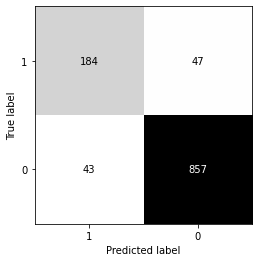

In [11]:
cat = 'cat3'
cv_predictions['pos_prediction'] = cv_predictions[f'{cat}_pred'] == 1
cv_predictions['pos_label'] = cv_predictions[f'{cat}_final_answer'] == 1

cm = confusion_matrix(cv_predictions['pos_label'], cv_predictions['pos_prediction'], labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])

print(f"Classification Report:\n {classification_report(cv_predictions['pos_label'], cv_predictions['pos_prediction'], digits=4)}\n")

print(f"Confusion matrix:")
disp.plot(include_values=True, cmap='gist_gray_r', ax=None, xticks_rotation='horizontal', values_format=None, colorbar=False)
plt.show()

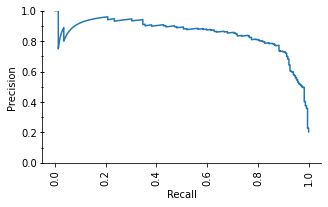

In [12]:
p, r, _ = precision_recall_curve(cv_predictions['cat3_final_answer'],cv_predictions['cat3_score'])
plot_pr_curve(r, p, x_label='Recall', y_label='Precision')

Evaluation of Precision@100

In [18]:
stage2_predictions = pd.read_csv('classifier_preds/scibert_2stage_predictions.tsv', sep='\t')[['tweet_id', 'text', 'cat1_final_answer', 'cat2_final_answer', 'cat3_final_answer', 'cat1_score', 'cat2_score', 'cat3_score']]

stage2_predictions[['tweet_id', 'cat1_final_answer', 'cat2_final_answer', 'cat3_final_answer', 'cat1_score', 'cat2_score', 'cat3_score']].to_csv('classifier_preds/scibert_2stage_predictions.tsv', sep='\t', index=False)

In [14]:
predictions = stage2_predictions.sort_values(by='cat1_score', ascending=False)
clf_top100_cat1 = predictions[:100]

print(f"Precision of classifier for 100 most confident cat1 predictions: {precision_score(clf_top100_cat1['cat1_final_answer'], [1]*len(clf_top100_cat1['cat1_final_answer'])):.2f}")

Precision of classifier for 100 most confident cat1 predictions: 0.85


In [15]:
predictions = stage2_predictions.sort_values(by='cat2_score', ascending=False)
clf_top100_cat2 = predictions[:100]

print(f"Precision of classifier for 100 most confident cat2 predictions: {precision_score(clf_top100_cat2['cat2_final_answer'], [1]*len(clf_top100_cat2['cat2_final_answer'])):.2f}")

Precision of classifier for 100 most confident cat2 predictions: 0.74


In [16]:
predictions = stage2_predictions.sort_values(by='cat3_score', ascending=False)
clf_top100_cat3 = predictions[:100]

print(f"Precision of classifier for 100 most confident cat3 predictions: {precision_score(clf_top100_cat3['cat3_final_answer'], [1]*len(clf_top100_cat3['cat3_final_answer'])):.2f}")

Precision of classifier for 100 most confident cat3 predictions: 0.86
